# Partitionnement

On va utiliser l'algorithme des $k$-means. Il fonctionne pour des données dérites dans $\mathbb{R}^m$ (bref des points). Il fonctionne en utilisant des analogies géométrique.

Son fonctionnement est décrit là : 
* https://fr.wikipedia.org/wiki/K-moyennes
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://scikit-learn.org/stable/modules/clustering.html
* https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

## Algorithme

* **Entrée** : 
    * un ensemble de $n$ points à classer
    * $k$ centres $g_1, \dots, g_k$ (avec $k << n$)
    * un nombre d'itérations $p$
    
* **Sortie** : $k$ classes

* **Algorithme** :
    * répète p fois :
        * Pour tout $i$ : on associe à la classe $C_i$ tous les points qui sont plus proche de $g_i$ que de tous les autres
            centres
        * Pour tout $i$ : on associe à $g_i$ le centre de gravité des éléments de $C_i$

Les $k$ premiers centres sont souvent choisis aléatoirement au départ. Ceci n'est pas un problème car les centres sont *attirés* par les ensembles denses de points.

L'algorithme est souvent recommencé plusieurs fois et c'est la *meilleure* solution qui est retenue selon le critère du minimum d'inertie intra-classes :

$$\sum_{i=1}^{k} \sum_{x \in C_i} || x - g_i||^2$$

### Génération de données

On crée 4 ensembles de données (des [blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)) pour tester l'algorithme : 

In [45]:
import pandas as pd
from sklearn.datasets import make_blobs

In [46]:
X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

blobs = pd.DataFrame(X, columns=['x', 'y'])

In [47]:
blobs

,x,y
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542
...,...,...
295,1.973698,1.579798
296,2.518342,1.391766
297,0.438990,4.535929
298,0.369479,7.791105


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

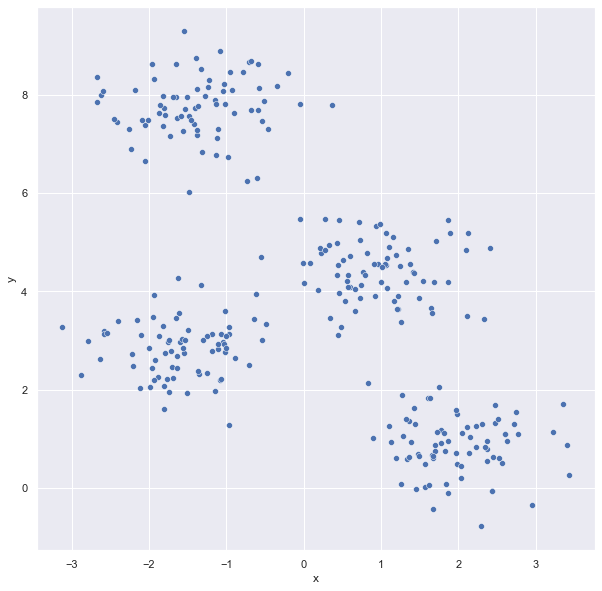

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=blobs,
                ax=ax)

plt.show()

### Utilisation de l'algorithme

On utilise l'implémentation faite dans [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

In [50]:
from sklearn.cluster import KMeans

Plusieurs paramètres possibles, on en utilisera 3 :
- `n_clusters` : nombre de classes voulues
- `n_init`: nombre de fois où l'on relance l'algorithme, le résultat rendu sera celui avec le minimum d'inertie.
- `max_iter` : pour chaque exécution de l'algorithme on s'arrête au bout de 300 itérations s'il n'y a paas eu convergence avant.


In [51]:
kmeans = KMeans(n_clusters=4,
                n_init=10, 
                max_iter=300).fit(blobs)

#### Nombre d'itération

On a laisser la possibilité de faire 300 itérations avant de s'arrêter s'il n'y a pas eu convergence. Notre algorithme en a fait beaucoup moins.

In [52]:
kmeans.n_iter_

3

#### les centres des classes

In [53]:
centers = kmeans.cluster_centers_

centers

array([[-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [-1.58438467,  2.83081263],
       [ 0.94973532,  4.41906906]])

#### les classes trouvées

Les points sont associés aux centre les plus proches

In [54]:
clusters_kmeans = kmeans.predict(blobs)

clusters_kmeans

array([1, 0, 3, 0, 1, 1, 2, 3, 0, 0, 2, 0, 3, 0, 1, 3, 3, 1, 2, 2, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 3, 2, 3, 3,
       2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 3, 0, 2, 2, 2,
       0, 1, 0, 2, 3, 2, 0, 2, 2, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 1, 3,
       0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 3, 2, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3,
       2, 2, 1, 0, 1, 3, 0, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       2, 1, 0, 2, 2, 0, 3, 0, 0, 2, 3, 2, 3, 2, 0, 3, 0, 0, 0, 3, 0, 3,
       1, 2, 0, 2, 1, 3, 0, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 0, 1, 3, 2, 0,
       1, 1, 3, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 0, 3, 2, 1, 2, 3, 0, 2, 0, 3, 0, 3, 2, 3, 3, 0, 2, 2, 1, 1, 3,
       0, 1, 1, 2, 1, 2, 3, 0, 0, 3, 3, 0, 3, 1, 2, 3, 1, 2, 0, 2, 1, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 3, 2, 1, 3, 2, 2, 2, 1, 1, 0, 3, 3, 2, 1,
       0, 2, 3, 0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 1, 1,
       0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 1, 3, 0, 2], d

#### Qualité du résultat

La qualité de la partition est qualticulé grâce à sont inertie. 

**Attention** : on ne peut pas connaître l'inertie minimum que l'on peut avoir pour un un jeu de donnée. C'est un problème NP-difficile. 

In [55]:
kmeans.inertia_

212.00599621083478

On va donner une couleur à chaque classe (la variable `colors`) ce qui nous permettra avec seaborn d'affecter un `hue` à chaque élément (sa classe) qui correspondra à la clé d'une couleur de la `palette` (un dictionnaire dont les clés sont des entier et les valeurs une couleur) :

In [56]:
#couleurs 
current_palette = sns.color_palette()
colors = {i: current_palette[i] for i in range(len(centers))}

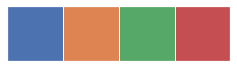

In [57]:
sns.palplot(current_palette[:len(centers)]) # https://seaborn.pydata.org/tutorial/color_palettes.html
plt.show()

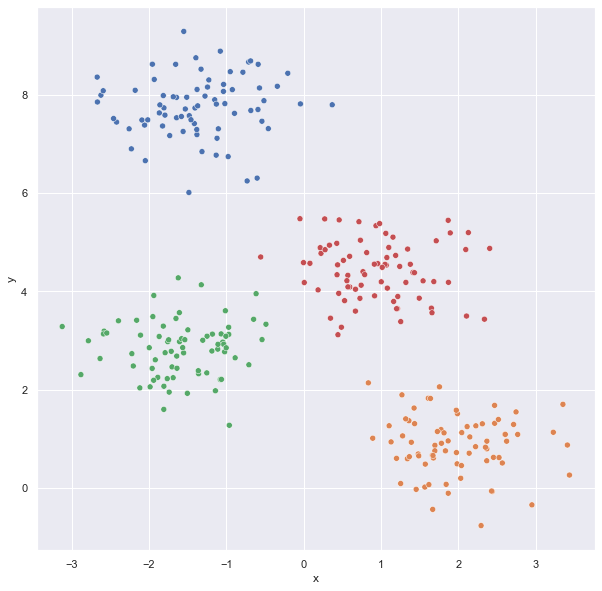

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=blobs,
                hue=clusters_kmeans,
                palette=colors,
                legend=False,
                ax=ax)

plt.show()

On ajoute le centre de chaque classe avec :
* la bonne couleur (le numéro de la classe en `hue` et la palette) 
* une grosse taille (`s=200`)
* et un peu transparent (`alpha=0.7`)

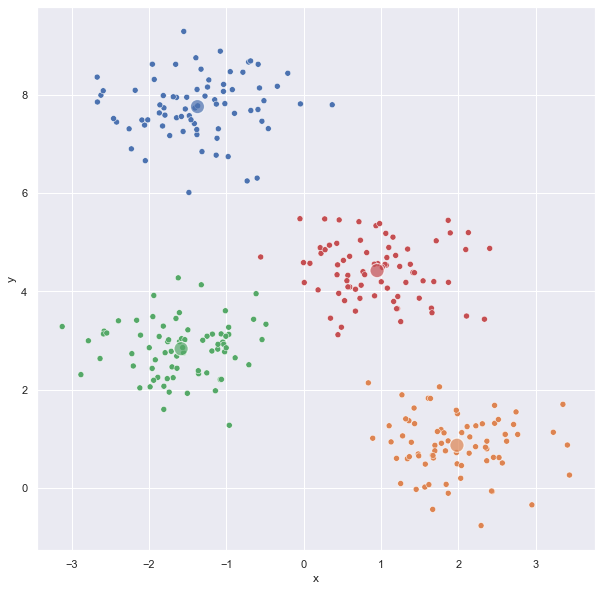

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=blobs,
                hue=clusters_kmeans,
                palette=colors,
                legend=False,
                ax=ax)

sns.scatterplot(x=centers[:, 0], y=centers[:, 1], 
                hue=list(range(len(centers))),
                palette=colors,
                s=200, alpha=0.7,
                legend=False,
                ax=ax)

plt.show()


## Convergence

L'algorithme converge vers une solution, au sens où les classes vont s'arrêter de bouger à partir d'un moment. On prouve cela en montrant que l'inertie diminue à chaque itération. Une fois que l'inertie ne diminue plus, le système est stable.

**preuve** : 
* Soient $C_1, \dots C_k$ les classes avant itération et $C'_1, \dots C'_k$ les classes après itération. 
* Soient $g_1, \dots g_k$ les centres de gravités de $C_1, \dots C_k$ et $g'_1, \dots g'_k$ les centres de gravités de $C'_1, \dots C'_k$.

Par construction de l'algorithme on a : $\sum_{i=1}^{k} \sum_{x \in C'_i} || x - g_i||^2 \leq \sum_{i=1}^{k} \sum_{x \in C_i} || x - g_i||^2$

et comme $\sum_{i=1}^{k} \sum_{x \in C'_i} || x - g'_i||^2  \leq \sum_{i=1}^{k} \sum_{x \in C'_i} || x - g_i||^2$ on a bien que l'inertie baisse.

**Remarque** : l'algorithmte comverge également si l'on recalcule le centre de gravité à chaque affectation. C'est la version *online* de l'algorithme.

**Attention** : L'algorithme converge, mais pas forcément à l'optimum ! C'est pour quoi on le relance plusieurs fois (typiquement 10 fois).

In [ ]:
# inertie finale pour le k-means précédent

kmeans.inertia_

## Utilisation

Comme on a une mesure de qualité du résultat (l'inertie) et que l'algorithme va très vite (il converge très très rapidment), on peur le lancer de nombreuses fois. 

C'est une méthode classique lorsque l'on essaie de résoudre des problème de façon approchée et que l'on possède un moyen de comparer les résultats entre eux (ce qui n'est pas toujours le cas).

In [ ]:
# nombre d'itération avant convergence. C'est très très inférieur au max = 300 

kmeans.n_iter_

## Condition d'utilisation

**Attention** : l'algorithme des $k$-means est très efficace dans son domaine de validité, mais il devient vite inefficace si l'on s'en éloigne.

Il faut en connaître les limites pour bien l'utiliser :

* nombre de dimensions
* forme des classes : rondes (gaussiennes)
* nombre de classes

### Nombre de dimensions

plus il y a de dimensions, plus il existe de minima locaux dans l'inertie (leur nombre augmente potentiellement  exponentiellement avec la dimension), et donc plus il se perd. 

On effectuera souvent **une réduction de dimension** avant (voir cours suivant).

### Forme des classes

L'algorithme des $k$-means cherche à trouver des classes **rondes**, il n'est donc pas adapté à la recherche de classe rectangulaires.

On va comparer les résultat avec 2 formes rectangulaires de classes.

#### Rectangles [1, 2] x [1, 3]

In [60]:
import random

rectangles = []

hauteur = 3 

for i in range(150):
    x = random.uniform(1, 2)
    y = random.uniform(1, hauteur)
    
    rectangles.append((x, y))

for i in range(150):
    x = random.uniform(3, 4)
    y = random.uniform(1, hauteur)
    
    rectangles.append((x, y))
    
rectangles = pd.DataFrame(rectangles, columns=['x', 'y'])

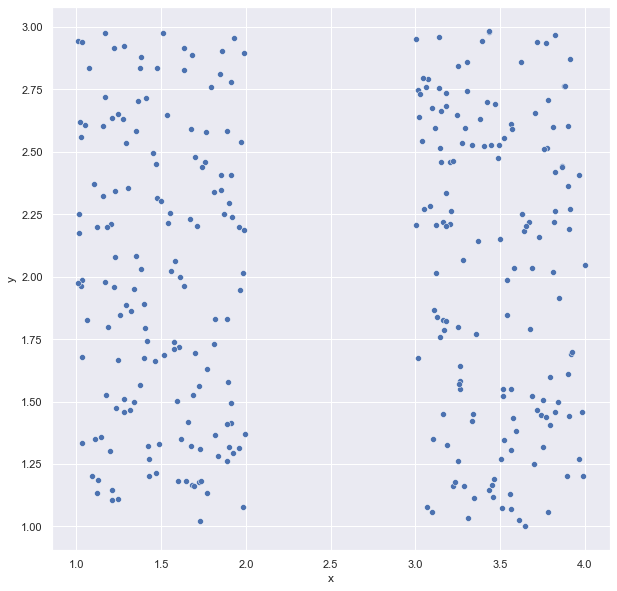

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=rectangles,
                ax=ax)

plt.show()

In [62]:
kmeans = KMeans(n_clusters=2,
                n_init=10, 
                max_iter=300).fit(rectangles)

clusters_kmeans = kmeans.predict(rectangles)
centers = kmeans.cluster_centers_

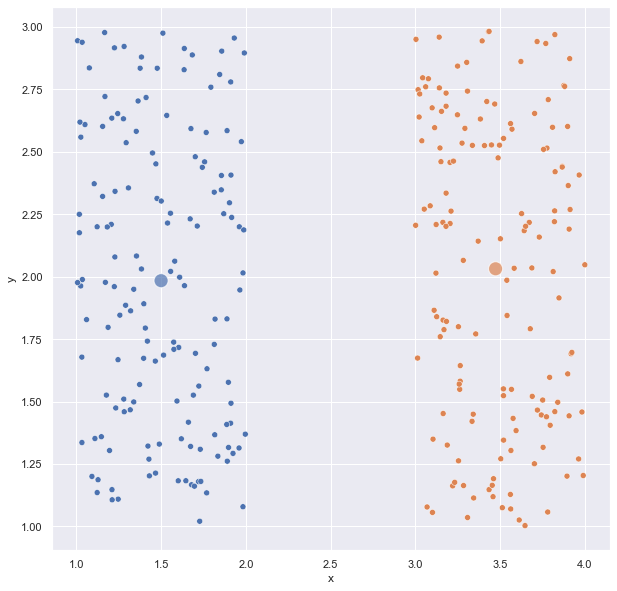

In [63]:
colors = {i: current_palette[i] for i in clusters_kmeans}

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=rectangles,
                hue=clusters_kmeans,
                palette=colors,
                legend=False,
                ax=ax)

sns.scatterplot(x=centers[:, 0], y=centers[:, 1], 
                hue=list(range(len(centers))),
                palette=colors,
                s=200, alpha=0.7,
                legend=False,
                ax=ax)


plt.show()

Le résulat est celui attendu car les classes rectangulaires s'inscrivent dans 2 disques disjoints.

In [64]:
from matplotlib.patches import Circle

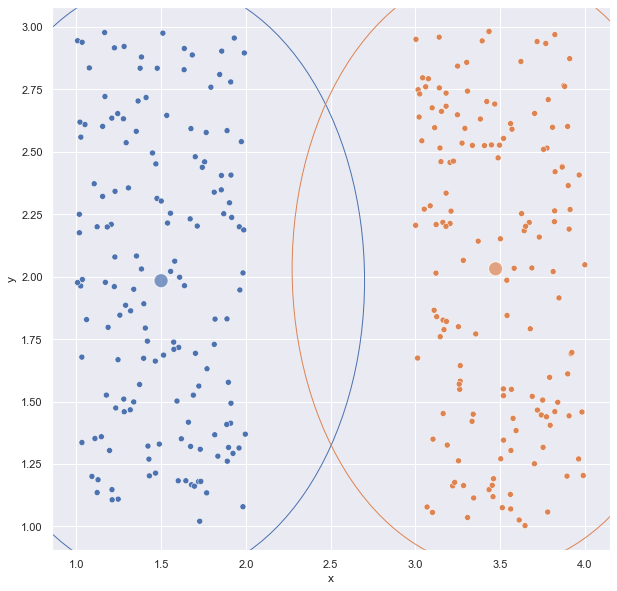

In [65]:
colors = {i: current_palette[i] for i in clusters_kmeans}

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=rectangles,
                hue=clusters_kmeans,
                palette=colors,
                legend=False,
                ax=ax)

sns.scatterplot(x=centers[:, 0], y=centers[:, 1], 
                hue=list(range(len(centers))),
                palette=colors,
                s=200, alpha=0.7,
                legend=False,
                ax=ax)

for i in range(len(centers)):
    x, y = centers[i]
    color = colors[i]
    ax.add_artist(Circle((x, y), 1.2, 
                         fill=False, 
                        edgecolor=color))


plt.show()

#### Rectangles [1, 2] x [1, 10]

Lorsque les rectangles grandissent, on ne peut plus vraiment les inscrire dans des disques disjoints.

In [66]:
import random

rectangles = []

hauteur = 10

for i in range(150):
    x = random.uniform(1, 2)
    y = random.uniform(1, hauteur)
    
    rectangles.append((x, y))

for i in range(150):
    x = random.uniform(3, 4)
    y = random.uniform(1, hauteur)
    
    rectangles.append((x, y))
    
rectangles = pd.DataFrame(rectangles, columns=['x', 'y'])

Dessinons les en respectant les dimensions des axes

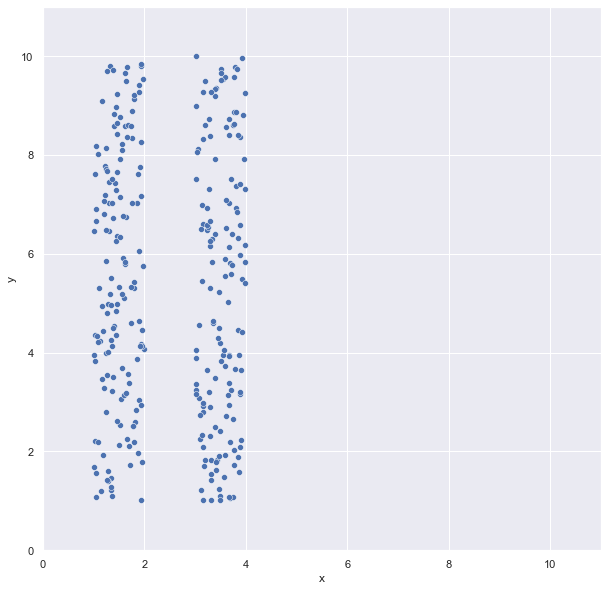

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(0, 11)
ax.set_ylim(0, 11)

sns.scatterplot(x='x', 
                y='y', 
                data=rectangles,
                ax=ax)

plt.show()

Regardons ce que va produire les $k$-means.

In [68]:
kmeans = KMeans(n_clusters=2,
                n_init=10, 
                max_iter=300).fit(rectangles)

clusters_kmeans = kmeans.predict(rectangles)
centers = kmeans.cluster_centers_

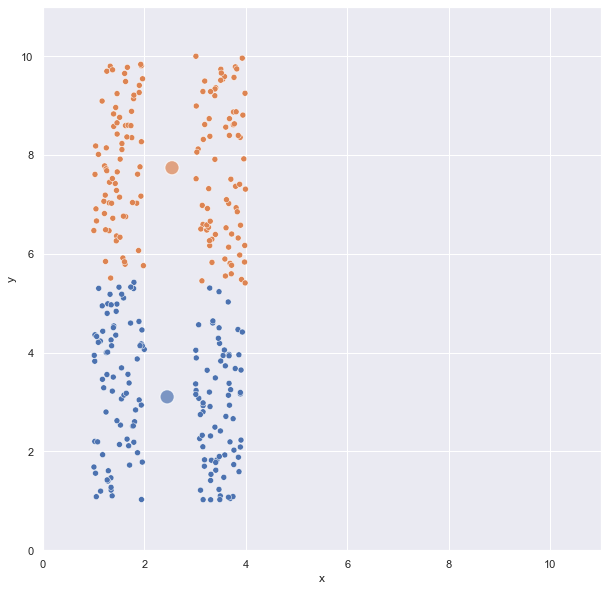

In [69]:
colors = {i: current_palette[i] for i in clusters_kmeans}

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(0, 11)
ax.set_ylim(0, 11)


sns.scatterplot(x='x', 
                y='y', 
                data=rectangles,
                hue=clusters_kmeans,
                palette=colors,
                legend=False,
                ax=ax)

sns.scatterplot(x=centers[:, 0], y=centers[:, 1], 
                hue=list(range(len(centers))),
                palette=colors,
                s=200, alpha=0.7,
                legend=False,
                ax=ax)


plt.show()

### Densité des classes

Il faut que les classes soient bien séparées et de densité équivalentes pour que l'algorithme ne se trompe pas. Nous allons utiliser les données de Ruspini pour exhiber le soucis.

In [70]:
# données de ruspini

ruspini = pd.read_csv("ruspini.csv").drop(columns='Unnamed: 0')

ruspini

,x,y
0,4,53
1,5,63
2,10,59
3,9,77
4,13,49
...,...,...
70,66,23
71,61,25
72,76,27
73,72,31


**Attention** : les $k$-means se font sur toutes les colonnes des données par défaut. C'est pourquoi on a supprimé (avec un drop) la colonne correspondant au label dans le chargement des données pour pas qu'il participe à l'algorithme.

In [71]:
data = ruspini

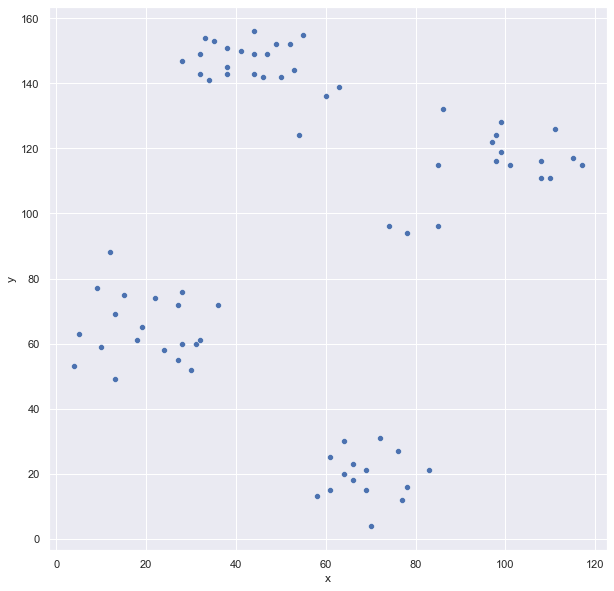

In [72]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=data,
                legend=False,
                ax=ax)
plt.show()

Les deux classes du haut semblent séparées, mais il existe des points qui font la jonction entre les deux. Si un centre initial est un de ces points, il va s'accaparer les 2 classes.

On ne fait qu'une seule itération en choisissant les centres de tel façon à ce qu'il n'y en ait qu'un seul avec une grande ordonnée.

In [73]:
import numpy as np

kmeans = KMeans(n_clusters=4,
                n_init=1, 
                init=np.array(((0, 0), (20, 0), (60, 0), (60, 140))),
                max_iter=300).fit(data)

clusters_kmeans = kmeans.predict(data)
centers = kmeans.cluster_centers_

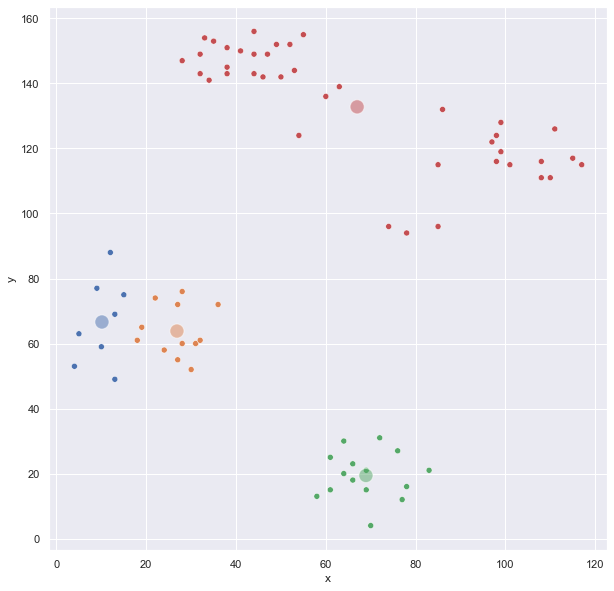

In [74]:
current_palette = sns.color_palette()
colors = {i: current_palette[i] for i in clusters_kmeans}

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=data,
                hue=clusters_kmeans, palette=colors,
                legend=False,
                ax=ax)

sns.scatterplot(x=centers[:, 0], y=centers[:, 1], 
                hue=list(range(len(centers))), palette=colors,
                s=200, alpha=0.5,
                legend=False)

plt.show()

In [75]:
kmeans.inertia_

49777.99166666666

**Remarque** : cela n'arrive quasi pas si les classes sont de même densité de points et que l'on lance plusieurs fois l'algorithme (l'inertie sera plus basse pour la *bonne* solution)

In [76]:
kmeans = KMeans(n_clusters=4,
                n_init=10, 
                max_iter=300).fit(data)

clusters_kmeans = kmeans.predict(data)
centers = kmeans.cluster_centers_

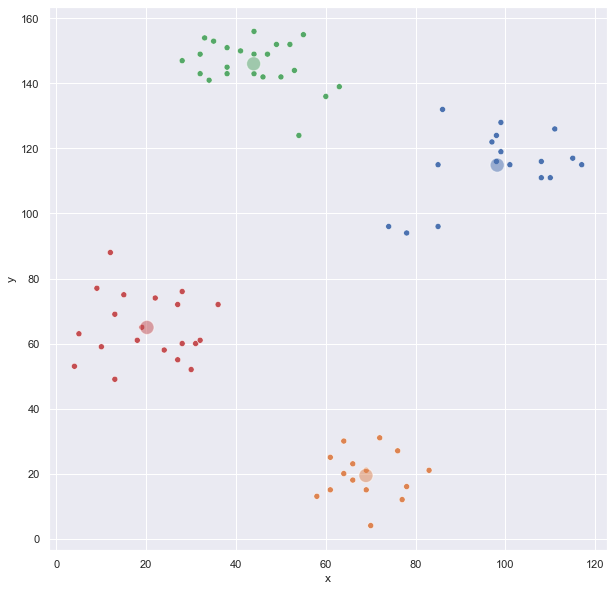

In [77]:
current_palette = sns.color_palette()
colors = {i: current_palette[i] for i in clusters_kmeans}

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=data,
                hue=clusters_kmeans, palette=colors,
                legend=False,
                ax=ax)

sns.scatterplot(x=centers[:, 0], y=centers[:, 1], 
                hue=list(range(len(centers))), palette=colors,
                s=200, alpha=0.5,
                legend=False)

plt.show()

In [78]:
kmeans.inertia_

12881.051236146632

## Nombre de classes

Un des principal problème des $k$-means est la détermination du nombre de classes lorsqu'on a aucune idée de ce que ça peut être.

Une règle courante est d'utiliser la même méthode que pour choisir le nombre d'axes à étudier en acp : on regarde le point d'inflexion de la courbe d'inertie (en anglais on appelle ça la *elbow method*).

Pour les $k$-means on effectuera plusieurs passe en augmentant le nombre de classe et on tracera le graphe de l'inertie.

In [79]:
inertie = []

for nb in range(1, 10):
    kmeans = KMeans(n_clusters=nb,
                    n_init=10, 
                    max_iter=300).fit(data)
    inertie.append(kmeans.inertia_)

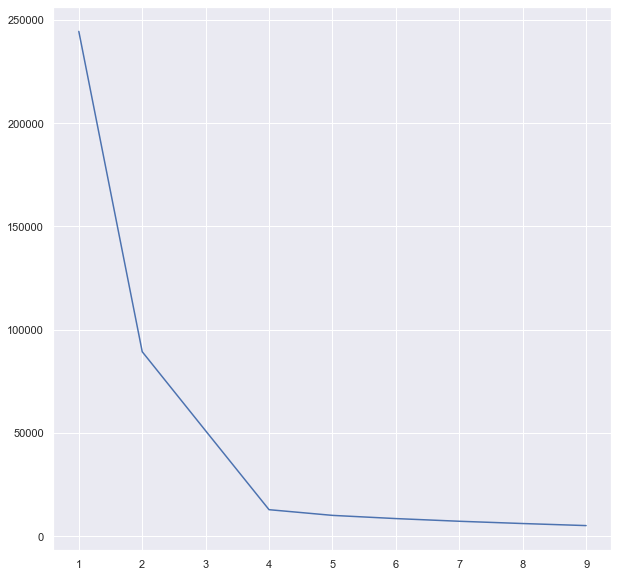

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.lineplot(x=list(range(1, len(inertie) + 1)), 
             y=inertie, 
             legend=False,
             ax=ax)
plt.show()

Le nombre de classe optimal est bien 4.

Au point d'inflexion, le *coût* d'ajout d'une classe est plus élevé que le gain en inertie.

## Dernière recommendation

Il faut que vos données soient interprétables. Même s'il n'y a rien à trouver un algorithme va produire une solution.

Vérifier **TOUJOURS** que les résultats de vos algorithmes ont un sens.

In [81]:
data = []
for i in range(300):
    x = random.uniform(1, 2)
    y = random.uniform(1, hauteur)
    
    data.append((x, y))

data = pd.DataFrame(data, columns=['x', 'y'])

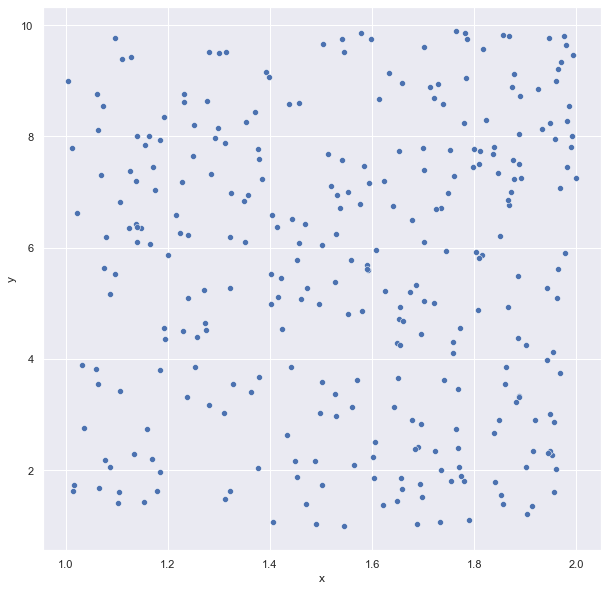

In [82]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=data,
                legend=False,
                ax=ax)
plt.show()

On a produit un jeu de donnée uniforme. Regardons ce que l'es $k$-means en font.

Commençons par chercher le nombre de classes :

In [83]:
inertie = []

for nb in range(1, 10):
    kmeans = KMeans(n_clusters=nb,
                    n_init=10, 
                    max_iter=300).fit(data)
    inertie.append(kmeans.inertia_)

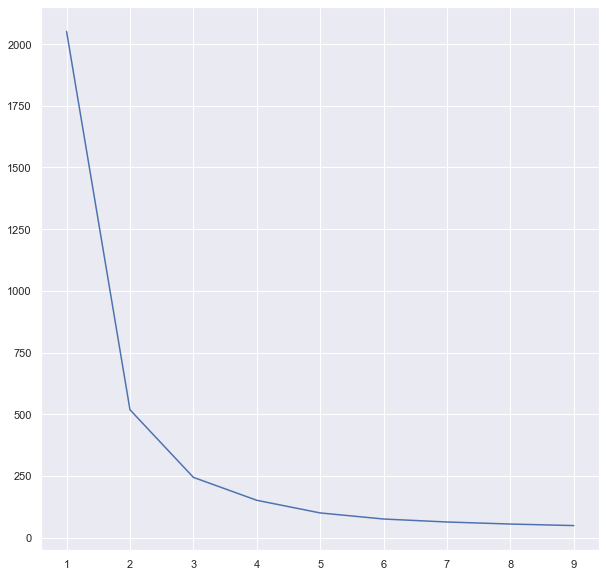

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.lineplot(x=list(range(1, len(inertie) + 1)), 
             y=inertie, 
             legend=False,
             ax=ax)
plt.show()

On a bien une basse d'inertie. On a l'impression  que 4 est un bon nombre de classes.

In [85]:
kmeans = KMeans(n_clusters=4,
                n_init=10, 
                max_iter=300).fit(data)

clusters_kmeans = kmeans.predict(data)
centers = kmeans.cluster_centers_

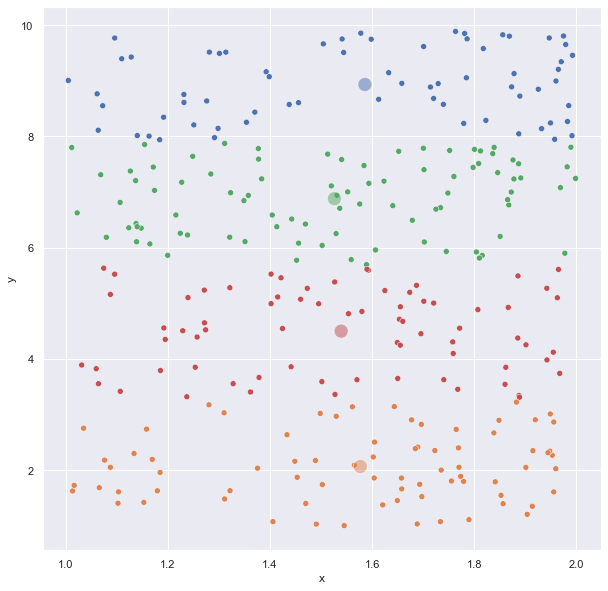

In [86]:
current_palette = sns.color_palette()
colors = {i: current_palette[i] for i in clusters_kmeans}

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=data,
                hue=clusters_kmeans, palette=colors,
                legend=False,
                ax=ax)

sns.scatterplot(x=centers[:, 0], y=centers[:, 1], 
                hue=list(range(len(centers))), palette=colors,
                s=200, alpha=0.5,
                legend=False)

plt.show()

On a 4 classes qui ont l'air sur le papier formidables. Mais en les regardans on ne voit qu'elle ne font que découper l'espace en 4. Il n'y a pas de valeur ajoutée aux classes par rapport zux axes originaux.